In [ ]:
%pip install imageai # установка библиотеки ImageAI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 KB 8.5 MB/s eta 0:00:00


# Добавляем в проект исходное изображение:

In [11]:
import numpy as np
import cv2
#from google.colab.patches import cv2_imshow
from urllib.request import urlopen
req = urlopen('https://img.youscreen.ru/wall/14977257054998/14977257054998_1920x1200.jpg') # используя метод urlopen, получаем объект запроса по ссылке (изображение)
                                                                                      # и сохраняем его в виде потокового набора данных в переменную "req"

image_2 = np.asarray(bytearray(req.read()), dtype=np.uint8) # преобразуем потоковый набор данных в массив numpy
image_2 = cv2.imdecode(image_2, -1) # декодируем изображение в привычный для отображения формат

#cv2.imshow('', image_2) # Выводим изображение, используя метод cv2_imshow()

# Пример №1. Детекция

[Техническая документация](https://imageai.readthedocs.io/en/latest/detection/index.html)

In [12]:
from imageai.Detection import ObjectDetection # Импортируем из библиотеки imageai класс ObjectDetection для поиска объектов
import os # Импортируем библиотеку os для взаимодействия с ОС

exec_path = os.getcwd()# Объявляем переменную exec_path и помещаем в неё функцию os.getcwd()для указания пути к данному проекту (для удобства работы с файлами, находящимися в корневой папке проекта)

detector = ObjectDetection() # создаем объект класса ObjectDetection
detector.setModelTypeAsRetinaNet() # обращаемся к методу setModelTypeAsRetinaNet, тем самым устанавливая для использования в проекте модель RetinaNet для распознавания объектов
detector.setModelPath("/content/drive/MyDrive/retinanet.pth") # указываем путь к модели (предварительно модель необходимо скачать с официального сайта ImageAI и поместить в корневую папку проекта)
detector.loadModel() # загружаем модель

list = detector.detectObjectsFromImage( # используем метод detectObjectsFromImage для обнаружения объектов на изображении
    input_image=image_2, # указываем путь к исходному изображению, либо имя переменной, которая уже содержит изображение
    output_image_path=os.path.join(exec_path, "new_objects.jpg"), # указываем имя и путь для сохранения распознанного изображения
    minimum_percentage_probability=60, # дополнительная характеристика, отвечающая за процент точности распознавания объекта. В данном случае, если точность объекта будет меньше, чем 60%, то в конечной выборке он присутствовать не будет
    display_percentage_probability=True, # отображение процента точности в конечном изображении
    display_object_name=True # отображение класса объекта в конечном изображении
)

#print(list)
#output_image = cv2.imread("/content/new_objects.jpg")
#cv2.imshow('', output_image)

ValueError: invalid path, path not pointing to a valid file.

# Пример №2. Классификация

[Техническая документация](https://imageai.readthedocs.io/en/latest/prediction/index.html)

In [ ]:
from imageai.Classification import ImageClassification
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 KB 8.8 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


In [ ]:
execution_path = "/content/drive/MyDrive/resnet50.pth"

prediction = ImageClassification()
prediction.setModelTypeAsResNet50()
prediction.setModelPath("/content/drive/MyDrive/resnet50.pth")
prediction.loadModel()

In [ ]:
predictions, probabilities = prediction.classifyImage((image_2), result_count=10)
for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction , " : " , eachProbability)

snow leopard  :  64.198
Arctic fox  :  12.8115
grey fox  :  5.4439
fox squirrel  :  2.533
cheetah  :  2.2291
cougar  :  2.1936
leopard  :  1.3279
lynx  :  1.2737
lion  :  0.9759
Egyptian cat  :  0.3976


# Задание №1. Детекция объектов на изображении

#### 1.1. Загрузка готовой модели для детекции объектов на изображении, отличной от той, что представлена в примере

In [45]:
from imageai.Detection import ObjectDetection # Импортируем из библиотеки imageai класс ObjectDetection для поиска объектов
import os # Импортируем библиотеку os для взаимодействия с ОС

exec_path = os.getcwd()# Объявляем переменную exec_path и помещаем в неё функцию os.getcwd()для указания пути к данному проекту (для удобства работы с файлами, находящимися в корневой папке проекта)
detector = ObjectDetection() # создаем объект класса ObjectDetection
detector.setModelTypeAsYOLOv3() # обращаемся к методу setModelTypeAsYOLOv3, тем самым устанавливая для использования в проекте модель YOLOv3 для распознавания объектов
detector.setModelPath(exec_path + '\yolov3.pt') # указываем путь к модели (предварительно модель необходимо скачать с официального сайта ImageAI и поместить в корневую папку проекта)
detector.loadModel()

#### 1.2. Используя данную модель, обработал 5 изображений с больши набором объектов, которые относятся к разным классам

In [46]:
import numpy as np
import cv2
from urllib.request import urlopen

urls = ['https://i.pinimg.com/originals/7a/5b/22/7a5b225c89739ffcbab50368d1d2adcd.jpg',
        'https://i.guim.co.uk/img/media/f2ec3f6e4d5417f8fc96ddb0043d0506421eb73e/0_0_4048_2395/master/4048.jpg?w=880&q=55&auto=format&usm=12&fit=max&s=2c6bccff9f66becbe87f28e6acac30fa',
        'https://intrigue.dating/wp-content/cache/thumb/cf/2e961a5c73695cf_900x0.jpg',
        'https://img.ntd.com/assets/uploads/external/2020/05/AP20123364983479.jpg',
        'https://i.pinimg.com/originals/7b/14/34/7b1434a9105e637ebe6095557397bfbd.jpg']
exec_path_task1 = exec_path + r'\task1'
for i in range(len(urls)):
    req = urlopen(urls[i])
    image = np.asarray(bytearray(req.read()), dtype=np.uint8)
    image = cv2.imdecode(image, -1)
    list = detector.detectObjectsFromImage( # используем метод detectObjectsFromImage для обнаружения объектов на изображении
        input_image=image, # указываем путь к исходному изображению, либо имя переменной, которая уже содержит изображение
        output_image_path=os.path.join(exec_path_task1, f"new_objects{i}.jpg"), # указываем имя и путь для сохранения распознанного изображения
        minimum_percentage_probability=60, # дополнительная характеристика, отвечающая за процент точности распознавания объекта. В данном случае, если точность объекта будет меньше, чем 60%, то в конечной выборке он присутствовать не будет
        display_percentage_probability=True, # отображение процента точности в конечном изображении
        display_object_name=True # отображение класса объекта в конечном изображении
    )
    print(list)
    

[{'name': 'person', 'percentage_probability': 89.59, 'box_points': [57, 105, 857, 701]}, {'name': 'person', 'percentage_probability': 99.97, 'box_points': [0, 579, 90, 701]}, {'name': 'person', 'percentage_probability': 99.88, 'box_points': [87, 605, 208, 701]}, {'name': 'person', 'percentage_probability': 99.69, 'box_points': [184, 596, 311, 701]}, {'name': 'person', 'percentage_probability': 99.99, 'box_points': [720, 643, 784, 701]}, {'name': 'person', 'percentage_probability': 99.38, 'box_points': [333, 547, 408, 689]}, {'name': 'person', 'percentage_probability': 99.97, 'box_points': [235, 554, 308, 655]}, {'name': 'person', 'percentage_probability': 99.24, 'box_points': [117, 543, 188, 653]}, {'name': 'person', 'percentage_probability': 99.95, 'box_points': [785, 661, 852, 701]}, {'name': 'person', 'percentage_probability': 99.82, 'box_points': [839, 608, 896, 700]}, {'name': 'backpack', 'percentage_probability': 81.88, 'box_points': [47, 544, 117, 660]}]
[{'name': 'person', 'per

#### 1.4. Визуализируйте полученные результаты

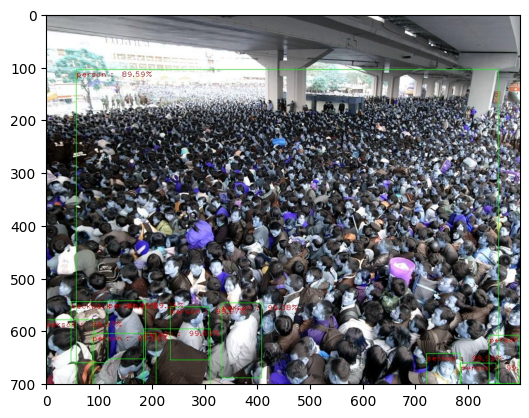

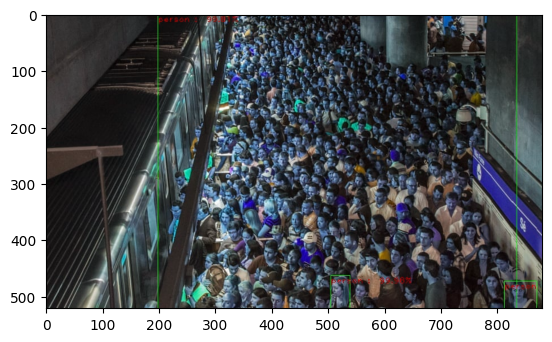

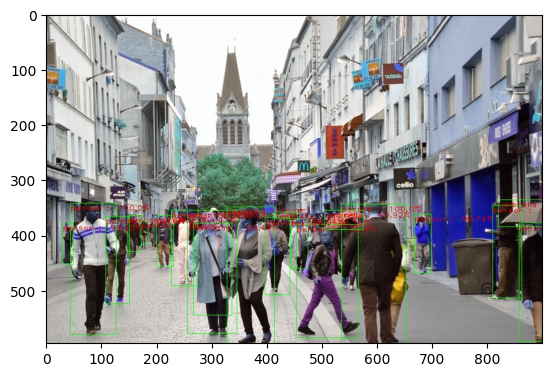

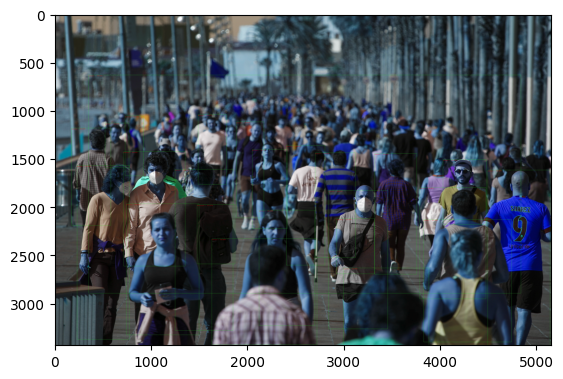

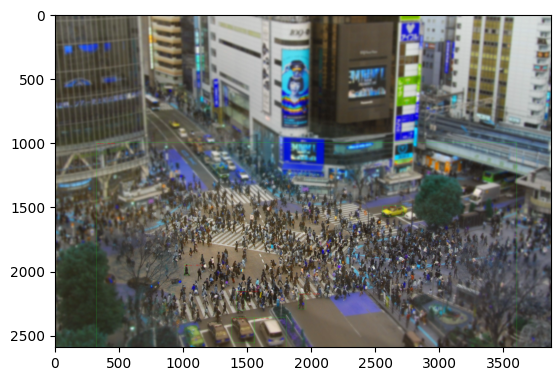

In [53]:
import matplotlib.pyplot as plt
for image in os.listdir(exec_path_task1):
    if (image.endswith(".jpg")):
        img = cv2.imread(os.path.join(exec_path_task1, image))
        fig = plt.figure()
        plt.imshow(img)

# Задание №2. Классификация изображений

#### 2.1. Загрузка готовой модели для классификации изображений, отличной от той, что представлена в примере

In [55]:
import os
from imageai.Classification import ImageClassification
exec_path = os.getcwd()

prediction = ImageClassification()
prediction.setModelTypeAsMobileNetV2()
prediction.setModelPath(os.path.join(exec_path, 'mobilenet_v2-b0353104.pth'))
prediction.loadModel()

c:\Users\1395003\Desktop\digital_image_processing\digital_image_processing\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\1395003\Desktop\digital_image_processing\digital_image_processing\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
c:\Users\1395003\Desktop\digital_image_processing\digital_image_processing\venv\Lib\site-packages\torchvision\models\inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_wei

#### 2.2. Используя данную модель, обработал 5 изображений, которые относятся к разным классам и сохранил полученные предсказания используемой модели

In [65]:
import numpy as np
import cv2
from urllib.request import urlopen

urls = ['https://www.1zoom.ru/big2/819/321881-svetik.jpg',
        'https://chudo-prirody.com/uploads/posts/2021-08/1628790785_59-p-morda-kota-foto-70.jpg',
        'https://kipmu.ru/wp-content/uploads/slnmgbgprg-scaled.jpg',
        'https://placepic.ru/wp-content/uploads/2019/06/zebra-1403093847jNA.jpg',
        'https://mykitai.ru/wp-content/uploads/2019/08/Bolshaya-panda.jpg']

for i in range(len(urls)):
    req = urlopen(urls[i]) 
    image_2 = np.asarray(bytearray(req.read()), dtype=np.uint8) # преобразуем потоковый набор данных в массив numpy
    image_2 = cv2.imdecode(image_2, -1)
    predictions, probabilities = prediction.classifyImage((image_2), result_count=10)

    with open("task2.txt", "a") as file:
        file.write(f"{urls[i]}\n")

    for eachPrediction, eachProbability in zip(predictions, probabilities):
        with open("task2.txt", "a") as file:
            file.write(f"{eachPrediction} : {eachProbability}\n")
        #print(eachPrediction , " : " , eachProbability)

    with open("task2.txt", "a") as file:
        file.write("\n")

## Задание №3. Детекция и трекинг объектов на видеопотоке

#### 3.1. Загрузил готовую модель для детекции объектов

In [67]:
from imageai.Detection import VideoObjectDetection
import os

exec_path = os.getcwd()

detector = VideoObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath(os.path.join(exec_path , "retinanet_resnet50_fpn_coco-eeacb38b.pth"))
detector.loadModel()

#### 3.2. Используя данную модель, обрабатываю 5 видеофайлов, и сохраняю полученные видеофайлы


Смотри результат по ссылке: https://drive.google.com/drive/folders/1yCrvpGF79_IfgYrPMCMUbe3Lkf6xim83?usp=share_link

In [69]:
exec_path_video = os.path.join(exec_path, 'video')

for image in os.listdir(exec_path_video):
    video_path = detector.detectObjectsFromVideo(
        input_file_path=os.path.join(exec_path_video, image),
        output_file_path=os.path.join(exec_path_video, f"result_{image}"),
        frames_per_second=20, 
        log_progress=True)

Processing Frame :  1
Processing Frame :  2
Processing Frame :  3
Processing Frame :  4
Processing Frame :  5
Processing Frame :  6
Processing Frame :  7
Processing Frame :  8
Processing Frame :  9
Processing Frame :  10
Processing Frame :  11
Processing Frame :  12
Processing Frame :  13
Processing Frame :  14
Processing Frame :  15
Processing Frame :  16
Processing Frame :  17
Processing Frame :  18
Processing Frame :  19
Processing Frame :  20
Processing Frame :  21
Processing Frame :  22
Processing Frame :  23
Processing Frame :  24
Processing Frame :  25
Processing Frame :  26
Processing Frame :  27
Processing Frame :  28
Processing Frame :  29
Processing Frame :  30
Processing Frame :  31
Processing Frame :  32
Processing Frame :  33
Processing Frame :  34
Processing Frame :  35
Processing Frame :  36
Processing Frame :  37
Processing Frame :  38
Processing Frame :  39
Processing Frame :  40
Processing Frame :  41
Processing Frame :  42
Processing Frame :  43
Processing Frame :  